In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt
from ML import Perceptron
from ML import linReg
from ML import logReg
from ML import SVM
import ML as ml
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
#Grab all target values for y
y = df.iloc[:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)
#Grab all target values for X
X = df.iloc[:100, [0, 1]].values

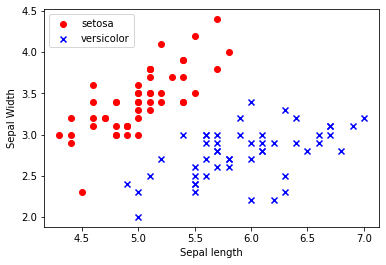

In [2]:
#Scatter plot
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o',
label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue',
marker='x', label='versicolor')
plt.xlabel('Sepal length')
plt.ylabel('Sepal Width')
plt.legend(loc='upper left')
plt.show()

In [3]:
#Creating the Perceptron
pn = Perceptron(0.2, 1000)
pn.fit(X, y)

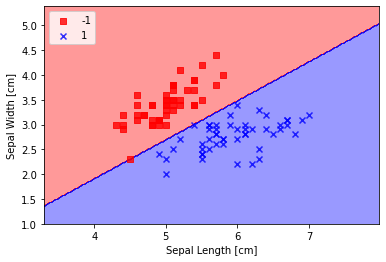

In [4]:
#Decision Boundry
ml.plot_decision_regions(X, y, pn, 0.02)
plt.xlabel('Sepal Length [cm]')
plt.ylabel('Sepal Width [cm]')
plt.legend(loc='upper left')
plt.show()

In [5]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
x = np.arange(100)
y = df.iloc[:100, 0].values

In [6]:
#Linear Regression Model
model = linReg()
model.fit(x, y)

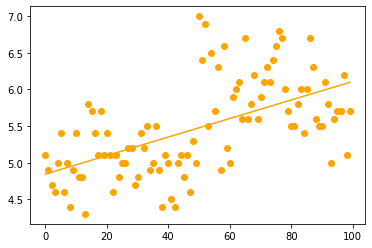

In [7]:
#Linear reggression line
predictions = model.predict(x)
plt.scatter(x = x, y = y, color='orange')
plt.plot(predictions, color='orange')
plt.show()

In [8]:
#Threshold
threshold = ml.thresholdFunc(x, y, predictions)
threshold

array([1., 1., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 1.,
       1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 0., 1., 0., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0.,
       1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0.])

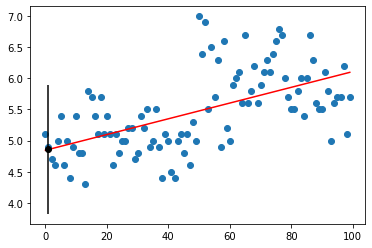

In [9]:
#intervals
model.interval(x, y, predictions, 1)

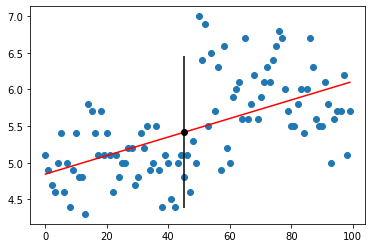

In [10]:
model.interval(x, y, predictions, 45)

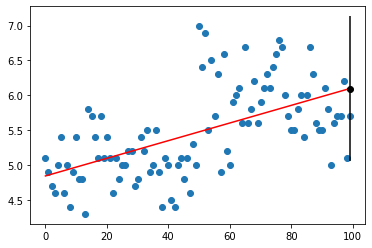

In [11]:
model.interval(x, y, predictions, 99)

In [12]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
#Grab all target values for y
y1 = df.iloc[:50, 4].values
y = df.iloc[50:, 4].values
y1 = np.where(y1 == 'Iris-setosa', 0, 1)
y = np.where(y == 'Iris-versicolor', 1, 1)
y = np.concatenate((y1, y), axis=0)

#Grab all target values for X
X = df.iloc[:, :2].values

In [13]:
#Logistic Model
logModel = logReg(lr=0.1, niter=300000)
logModel.fit(X, y)
preds = logModel.predict(X)

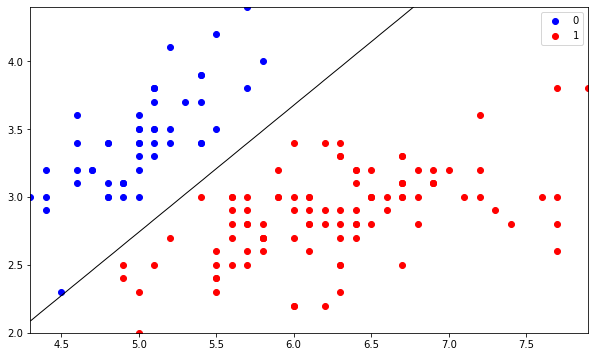

In [14]:
plt.figure(figsize=(10, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='b', label='0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='r', label='1')
plt.legend()
x1_min, x1_max = X[:,0].min(), X[:,0].max(),
x2_min, x2_max = X[:,1].min(), X[:,1].max(),
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
grid = np.c_[xx1.ravel(), xx2.ravel()]
probs = logModel.predict_prob(grid).reshape(xx1.shape)
plt.contour(xx1, xx2, probs, [0.5], linewidths=1, colors='black');

In [15]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
#Grab all target values for y
y1 = df.iloc[:50, 4].values
y = df.iloc[50:, 4].values
y1 = np.where(y1 == 'Iris-setosa', 0, 1)
y = np.where(y == 'Iris-versicolor', 1, 1)
y = np.concatenate((y1, y), axis=0)

#Grab all target values for X
X = df.iloc[:, :2].values

In [16]:
#Here we use kNN as a classifier. 
#It finds the distance to the nearest points
#then which ever points are closest, it will classify them the same as that
#based on the training data
#As you can see in the scatter plot, the lower left point at (~4.5, ~2.35) 
#was previously blue in the logReg example, but is now red based on 
#kNN's classification
pred = []
for i in range(150):
    temp = ml.kNN(X, y, X[i], k=5)
    pred.append(temp)
pred = np.array(pred)

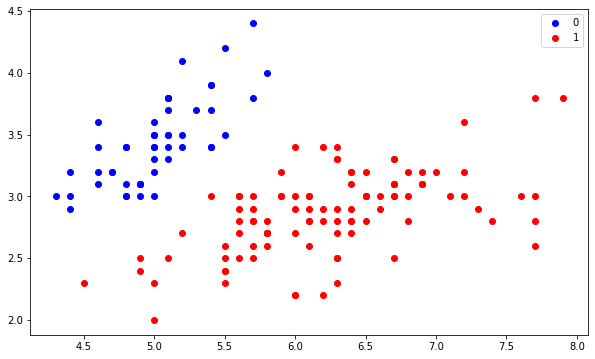

In [17]:
plt.figure(figsize=(10, 6))
plt.scatter(X[pred == 0][:, 0], X[pred == 0][:, 1], color='b', label='0')
plt.scatter(X[pred == 1][:, 0], X[pred == 1][:, 1], color='r', label='1')
plt.legend()

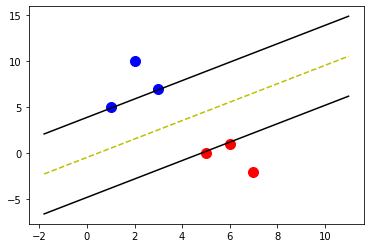

In [18]:
#Soft SVM
data = {-1:np.array([[1,5],[2,10],[3,7]]),1:np.array([[5,0],[6,1],[7,-2]])}
svm = SVM() # Linear Kernel
svm.fit(data=data)
svm.visualize()